## **1. Dataset 구성**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns

from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import warnings
from keras.callbacks import EarlyStopping

warnings.filterwarnings('ignore')

df = DataFrame(pd.read_csv('creditcard.csv'))

In [3]:
df.info()
# df.describe()
# df.values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### * **class 값 분석**

In [4]:
print("No Frauds", round(df["Class"].value_counts()[0]/len(df) * 100,2),
     "%of the dateset")
print("Frauds", round(df["Class"].value_counts()[1]/len(df) * 100,2),
     "%of the dateset")

No Frauds 99.83 %of the dateset
Frauds 0.17 %of the dateset


In [6]:
X=df[df.columns[:-2]]
Y=df['Class']
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

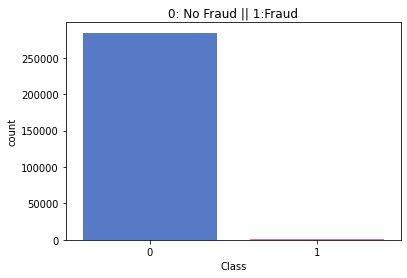

In [5]:
colors = ["#4374D9", "#F361A6"]

sns.countplot("Class", data=df, palette=colors)
plt.title("0: No Fraud || 1:Fraud")
plt.show()

### * **StandardScaler Amount 값 정규화**

In [7]:
dataset = df.values
amount = dataset[:,29]
# 정규화를 위한 차원변경
amount = amount.reshape(-1, 1)

In [8]:
# StandardScaler() 정규화
standardScaler = StandardScaler()
rob_scaler = RobustScaler()
amount_data_standard = standardScaler.fit(amount).transform(amount)

### * **Time 데이터 정규화 방법 분석**

In [9]:
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['loged_time'] = np.log1p(df['Time'].values.reshape(-1,1))
df['std_time'] = standardScaler.fit_transform(df['Time'].values.reshape(-1,1))

(-1.996583023457193, 1.6420577336572635)

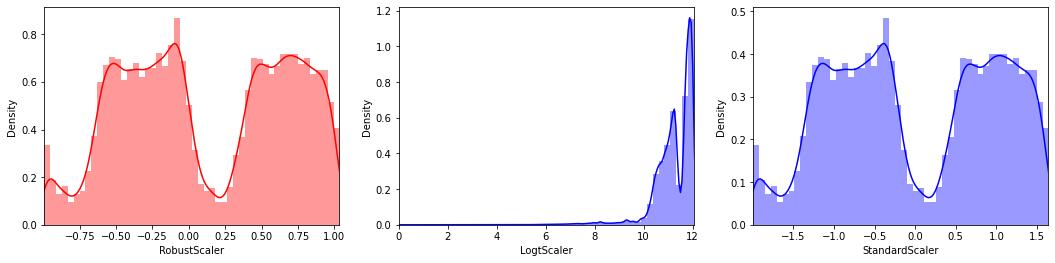

In [10]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
scaled_time = df['scaled_time'].values
loged_time = df['loged_time'].values
std_time = df['std_time'].values

sns.distplot(scaled_time, ax=ax[0], color='r', axlabel="RobustScaler")
ax[0].set_xlim(min(scaled_time), max(scaled_time))

sns.distplot(loged_time, ax=ax[1], color='b', axlabel="LogtScaler")
ax[1].set_xlim(min(loged_time), max(loged_time))

sns.distplot(std_time, ax=ax[2], color='b', axlabel="StandardScaler")
ax[2].set_xlim(min(std_time), max(std_time))

### * **RobustScaler를 활용한 Time 데이터 정규화**

In [14]:
dataset = df.values
time_1 = dataset[:,0]
time_1 = time_1.reshape(-1, 1)

rob_scaler = RobustScaler()
time_data_robust = rob_scaler.fit(time_1).transform(time_1)
time_data_robust

array([[-0.99498349],
       [-0.99498349],
       [-0.99497175],
       ...,
       [ 1.03497457],
       [ 1.03497457],
       [ 1.03502156]])

In [17]:
amount_data = pd.DataFrame(amount_data_standard)
time_data = pd.DataFrame(time_data_robust)
time_data.columns = ['normalTime']
time_data
# print(type(time_data))

,normalTime
0,-0.994983
1,-0.994983
2,-0.994972
3,-0.994972
4,-0.994960
...,...
284802,1.034951
284803,1.034963
284804,1.034975
284805,1.034975


In [16]:
# 정규화 된 Amount data 컬럼명 normalAmount로 지정
amount_data.columns = ['normalAmount']
amount_data

,normalAmount
0,0.244964
1,-0.342475
2,1.160686
3,0.140534
4,-0.073403
...,...
284802,-0.350151
284803,-0.254117
284804,-0.081839
284805,-0.313249


In [18]:
# 기존에 있던 Time, Amount 데이터 drop
df.drop('Time', axis=1, inplace = True)
df.drop('Amount', axis=1, inplace = True)
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,scaled_time,loged_time,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,0.000000,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,0.000000,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,0.693147,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,0.693147,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,1.098612,-1.996541
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.994960,1.098612,-1.996541
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.994937,1.609438,-1.996499
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.994901,2.079442,-1.996436
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,-0.994901,2.079442,-1.996436
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.994878,2.302585,-1.996394


In [19]:
# 정규화된 Time,Amount data 삽입
df.insert(0,'normalTime', amount_data )
df.insert(29,'normalAmount',time_data)
df.head(10)

,normalTime,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,normalAmount,Class,scaled_time,loged_time,std_time
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,-0.994983,0,-0.994983,0.000000,-1.996583
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.994983,0,-0.994983,0.000000,-1.996583
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-0.994972,0,-0.994972,0.693147,-1.996562
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,-0.994972,0,-0.994972,0.693147,-1.996562
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.994960,0,-0.994960,1.098612,-1.996541
5,-0.338556,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.994960,0,-0.994960,1.098612,-1.996541
6,-0.333279,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.994937,0,-0.994937,1.609438,-1.996499
7,-0.190107,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.994901,0,-0.994901,2.079442,-1.996436
8,0.019392,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,1.011592,0.373205,-0.384157,0.011747,0.142404,-0.994901,0,-0.994901,2.079442,-1.996436
9,-0.338516,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.994878,0,-0.994878,2.302585,-1.996394


### * **Class = 1, Class = 0값 비율을 위한 샘플링 추출**

In [39]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df  = df.loc[df['Class'] == 0][:492]

normal_distributed_df= pd.concat([fraud_df, non_fraud_df])

df = normal_distributed_df.sample(frac=1, random_state=42)

df.head(20)

,normalTime,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,normalAmount,Class,scaled_time,loged_time,std_time
106839,-0.265311,1.411190,-0.713597,0.386150,-1.007847,-0.577021,0.565564,-1.062723,0.113954,-0.433717,...,-1.248912,0.565982,0.062935,0.055746,0.011886,-0.170820,0,-0.170820,11.158434,-0.519328
72757,-0.346073,-2.986466,-0.000891,0.605887,0.338338,0.685448,-1.581954,0.504206,-0.233403,0.636768,...,0.355065,0.448552,0.193490,1.214588,-0.013923,-0.350639,1,-0.350639,10.912303,-0.841640
155713,-0.308171,-0.513840,0.752265,2.375663,-0.104836,0.060729,-0.274978,0.502985,-0.213632,1.615484,...,-0.136685,0.229910,-0.722749,-0.084214,-0.147139,0.252599,0,0.252599,11.573023,0.239621
10204,-0.307691,-4.641893,2.902086,-1.572939,2.507299,-0.871783,-1.040903,-1.593901,-3.254905,1.908963,...,0.645545,-0.354558,-0.611764,-3.908080,-0.671248,-0.809161,1,-0.809161,9.668904,-1.663510
231978,-0.321245,-2.064240,2.629739,-0.748406,0.694992,0.418178,1.392520,-1.697801,-6.333065,1.724184,...,-1.051685,0.209178,-0.319859,0.015434,-0.050117,0.731987,1,0.731987,11.898181,1.098890
27895,0.422399,0.861545,-1.065624,0.672919,0.570590,-1.205622,0.270839,-0.673109,0.221099,-0.896328,...,-0.034928,0.180498,-0.303340,0.039835,0.054071,-0.586661,0,-0.586661,10.456136,-1.264694
64436,-0.280184,1.593954,-1.041333,-1.593685,-2.524160,1.340290,2.947308,-1.047326,0.614772,-2.322846,...,0.943166,0.499233,-0.434746,0.004902,0.009553,-0.394119,0,-0.394119,10.842440,-0.919576
190368,0.350034,-2.272473,2.935226,-4.871394,2.419012,-1.513022,-0.480625,-2.126136,1.883507,-1.297262,...,0.322913,-0.058406,-0.411649,0.573803,0.176067,0.518227,1,0.518227,11.766047,0.715741
57349,-0.277186,-0.334815,1.189703,1.748604,2.729949,0.291077,0.468765,0.478128,0.192521,-1.845558,...,0.262088,-0.326833,0.330151,0.151411,0.135550,-0.432583,0,-0.432583,10.776286,-0.988519
200319,-0.345313,2.053859,0.017620,-1.044302,0.398776,-0.017421,-1.103648,0.242713,-0.369792,0.378501,...,0.015987,-0.277432,0.197468,-0.060623,-0.058174,0.572081,0,0.572081,11.801017,0.812270


In [44]:
X=df[df.columns[:-2]]
Y=df['Class']
Y.value_counts()

0    492
1    492
Name: Class, dtype: int64

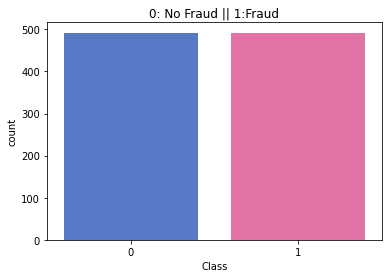

In [43]:
sns.countplot('Class', data=df, palette=colors)
plt.title("0: No Fraud || 1:Fraud")
plt.show()

----

## 3. Class를 종속변수 사용

In [40]:
np.random.seed(3)
tf.random.set_seed(3)

X = df.values[:,0:30]
Y = df.values[:,30]

## 4. Train Set : Test set = 85:15

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.15, random_state=42)

## 5. ANN/DNN활용

In [60]:
model = Sequential()

model.add(Dense(30, input_dim=30, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 방법
model_path='./model/{epoch:02d}-{val_loss:.4f},hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 조기 종료
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(X_train, Y_train, validation_split=0.15,epochs = 200, batch_size = 100, callbacks=[early_stopping_callback,checkpointer])
score = model.evaluate(X_test, Y_test, verbose = 0)

print(f'테스트 손실값 : {score[0]}, 테스트 정확도 : {score[1]}')

Epoch 1/200
8/8 [==============================] - 0s 19ms/step - loss: 1.2759 - accuracy: 0.5115 - val_loss: 0.9241 - val_accuracy: 0.4841

Epoch 00001: val_loss improved from inf to 0.92415, saving model to ./model\01-0.9241,hdf5
INFO:tensorflow:Assets written to: ./model\01-0.9241,hdf5\assets
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8384 - accuracy: 0.5548 - val_loss: 0.6775 - val_accuracy: 0.6905

Epoch 00002: val_loss improved from 0.92415 to 0.67755, saving model to ./model\02-0.6775,hdf5
INFO:tensorflow:Assets written to: ./model\02-0.6775,hdf5\assets
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.7307 - val_loss: 0.5560 - val_accuracy: 0.8333

Epoch 00003: val_loss improved from 0.67755 to 0.55602, saving model to ./model\03-0.5560,hdf5
INFO:tensorflow:Assets written to: ./model\03-0.5560,hdf5\assets
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5309 - accuracy: 0.8552 - val_


Epoch 00065: val_loss did not improve from 0.16970
Epoch 66/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0821 - accuracy: 0.9759 - val_loss: 0.1990 - val_accuracy: 0.9206

Epoch 00066: val_loss did not improve from 0.16970
Epoch 67/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0605 - accuracy: 0.9876 - val_loss: 0.2008 - val_accuracy: 0.9206

Epoch 00067: val_loss did not improve from 0.16970
Epoch 68/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0632 - accuracy: 0.9756 - val_loss: 0.2017 - val_accuracy: 0.9206

Epoch 00068: val_loss did not improve from 0.16970
Epoch 69/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0582 - accuracy: 0.9850 - val_loss: 0.2028 - val_accuracy: 0.9206

Epoch 00069: val_loss did not improve from 0.16970
Epoch 70/200
8/8 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9852 - val_loss: 0.2008 - val_accuracy: 0.9206

Epoch 00070: val_loss did not improve f


# epochs = 1500, batch_size = 5

Epoch 00105: val_loss did not improve from 0.17426
Epoch 106/1500
142/142 [==============================] - 0s 840us/step - loss: 1.4069e-06 - accuracy: 1.0000 - val_loss: 0.8913 - val_accuracy: 0.9206

Epoch 00106: val_loss did not improve from 0.17426
Epoch 107/1500
142/142 [==============================] - 0s 863us/step - loss: 1.8665e-06 - accuracy: 1.0000 - val_loss: 0.8933 - val_accuracy: 0.9206

Epoch 00107: val_loss did not improve from 0.17426
Epoch 108/1500
142/142 [==============================] - 0s 821us/step - loss: 1.4894e-06 - accuracy: 1.0000 - val_loss: 0.8921 - val_accuracy: 0.9206

Epoch 00108: val_loss did not improve from 0.17426

<span style="color:red"> 테스트 손실값 : 0.3308659493923187, 테스트 정확도 : 0.9594594836235046 </span>

---

# epochs = 150, batch_size = 5

Epoch 00108: val_loss did not improve from 0.13124
Epoch 109/150
142/142 [==============================] - 0s 711us/step - loss: 4.2829e-05 - accuracy: 1.0000 - val_loss: 0.6496 - val_accuracy: 0.9286

Epoch 00109: val_loss did not improve from 0.13124
Epoch 110/150
142/142 [==============================] - 0s 703us/step - loss: 4.2771e-05 - accuracy: 1.0000 - val_loss: 0.6588 - val_accuracy: 0.9286

Epoch 00110: val_loss did not improve from 0.13124
Epoch 111/150
142/142 [==============================] - 0s 741us/step - loss: 3.1245e-05 - accuracy: 1.0000 - val_loss: 0.6483 - val_accuracy: 0.9286

Epoch 00111: val_loss did not improve from 0.13124

<span style="color:red"> 테스트 손실값 : 0.4469115734100342, 테스트 정확도 : 0.9459459185600281</span>

---
# epochs = 150, batch_size = 50



Epoch 124/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3363 - val_accuracy: 0.9444

Epoch 00124: val_loss did not improve from 0.16326
Epoch 125/150
15/15 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3370 - val_accuracy: 0.9444

Epoch 00125: val_loss did not improve from 0.16326

<span style="color:red"> 테스트 손실값 : 0.23782743513584137, 테스트 정확도 : 0.9594594836235046</span>

---
# epochs = 300, batch_size = 50


Epoch 00122: val_loss did not improve from 0.16326
Epoch 123/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3359 - val_accuracy: 0.9444

Epoch 00123: val_loss did not improve from 0.16326
Epoch 124/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3363 - val_accuracy: 0.9444

Epoch 00124: val_loss did not improve from 0.16326
Epoch 125/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3370 - val_accuracy: 0.9444

Epoch 00125: val_loss did not improve from 0.16326

<span style="color:red"> 테스트 손실값 : 0.23782743513584137, 테스트 정확도 : 0.9594594836235046</span>

---

# epochs = 200 batch_size = 150

Epoch 00132: val_loss did not improve from 0.14258
Epoch 133/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.2127 - val_accuracy: 0.9524

Epoch 00133: val_loss did not improve from 0.14258
Epoch 134/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2158 - val_accuracy: 0.9524

Epoch 00134: val_loss did not improve from 0.14258
Epoch 135/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2172 - val_accuracy: 0.9524

Epoch 00135: val_loss did not improve from 0.14258

<span style="color:red"> 테스트 손실값 : 0.724395751953125, 테스트 정확도 : 0.9189189076423645</span>

---


In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_29 (Dense)             (None, 18)                558       
_________________________________________________________________
dense_30 (Dense)             (None, 12)                228       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 13        
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [62]:
history.history
# 딕셔너리 형태
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
y_value = history.history['val_loss']  # 오차값을 저장
y_acc = history.history['accuracy']    # 정밀도를 저장

print(len(y_value))
print(len(y_acc))

147
147


### * **오차,정확도 그래프**

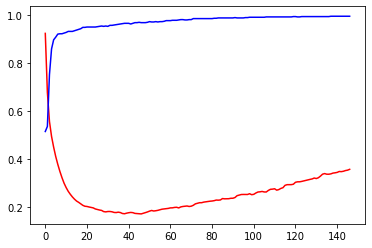

In [64]:
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_value, c='red', markersize=3)
plt.plot(x_len, y_acc, c='blue', markersize=3)

### * **Class=1값 정확도 검증**

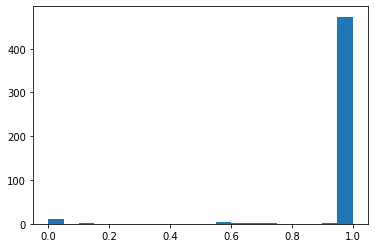

In [54]:
class_one = df["Class"] == 1
all_class_1 = df[class_one]

all_class_1.drop('Class', axis=1, inplace = True)
all_class_1.drop('scaled_time', axis=1, inplace = True)
all_class_1.drop('loged_time', axis=1, inplace = True)
all_class_1.drop('std_time', axis=1, inplace = True)
all_class_1

dt_one = pd.DataFrame(model.predict(all_class_1))
plt.hist(dt_one, bins=20)
plt.show()